In [1]:
from flask import Flask
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
url='https://election.ekantipur.com/?lng=eng'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}


In [5]:
page = requests.get(url=url, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

In [44]:

card = soup1.find_all('div', class_ = 'col legend-pn')
parties_samanupatik = []
for i in card:
    parties_samanupatik.append((str(i.text)))


In [45]:
card2 = soup1.find_all('div', class_ = 'px-2 py-3 border-bottom')
votes = []
for i in card2:
    votes.append(str(i.text))
votes_num = []
for i in range(len(votes)):
    a=re.findall('\d+', votes[i])
    b = [''.join(a[0 : ])]
    c =pd.to_numeric(b)
    votes_num.append(c)
votes_num
    
    



[array([2548235]),
 array([2412707]),
 array([1077472]),
 array([1065468]),
 array([546433]),
 array([333041]),
 array([272030]),
 array([254620])]

In [50]:
len(parties_samanupatik)

9

In [51]:
parties_samanupatik[0:8]

['CPN-UML',
 'Nepali Congress',
 'CPN (Maoist Center)',
 'Rastriya Swatantra Party',
 'Rastriya Prajatantra Party',
 'Janata Samajbadi Party',
 'Janamat Party',
 'CPN (Unified Socialist)']

In [47]:
parties_samanupatik

['CPN-UML',
 'Nepali Congress',
 'CPN (Maoist Center)',
 'Rastriya Swatantra Party',
 'Rastriya Prajatantra Party',
 'Janata Samajbadi Party',
 'Janamat Party',
 'CPN (Unified Socialist)',
 '\n\n                        Details                        \n\n\n\n\n\n\n']

In [66]:
def load_update(url):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

  page = requests.get(url=url, headers=headers)

  soup1 = BeautifulSoup(page.content, "html.parser")

  parties = []
  card = soup1.find_all('div', class_ = 'card-body p-0')
  for a in card:
    b = a.find_all('div', class_='party-name m-0 p-0')
    for i in b:
      parties.append((str(i.text)))

  win = []
  for a in card:
    b = a.find_all('div', class_='number-display text-green')
    for i in b:
      win.append(int(i.text))


  lead =[]
  for a in card:
    b = a.find_all('div', class_='number-display text-orange')
    for i in b:
      lead.append(int(i.text))

  
  federal_party = parties[0:10]
  federal_win = win[0:10]
  fedearal_lead = lead[0:10]
  parliment_party = parties[10:]
  parliment_win = win[10:]
  parliment_lead = lead[10:]

  #samanupakit
  card = soup1.find_all('div', class_ = 'col legend-pn')
  parties_samanupatik = []
  for i in card:
      parties_samanupatik.append((str(i.text)))
  parties_samanupatik=parties_samanupatik[0:8]
  
  
  card2 = soup1.find_all('div', class_ = 'px-2 py-3 border-bottom')
  votes = []
  for i in card2:
      votes.append(str(i.text))
  votes_num = []
  for i in range(len(votes)):
      a=re.findall('\d+', votes[i])
      b = [''.join(a[0 : ])]
      c =pd.to_numeric(b)
      votes_num.append(c)

  #data for visulization federal
  data = {'win': federal_win,
        'lead': fedearal_lead
       }


  df = pd.DataFrame(data, index=federal_party)

  plt.style.use('ggplot')

  df.plot.barh()

  plt.title('Federal Parliment')
  plt.ylabel('party')
  plt.xlabel('area')
  plt.savefig('./static/images/new_plot.png', bbox_inches='tight')
 #data visulization Provincial Assembly

  data2 = {'win': parliment_win,
        'lead': parliment_lead
       }


  df3 = pd.DataFrame(data2, index=parliment_party)

  plt.style.use('ggplot')

  df3.plot.barh()

  plt.title('Provincial Assembly')
  plt.ylabel('party')
  plt.xlabel('area')
  plt.savefig('./static/images/provincial_plot.png', bbox_inches='tight')

  ##data for visulization samanupakit
  df2 = pd.DataFrame(votes_num, index=parties_samanupatik)
  df2.plot.barh()
  plt.title("Samanupatik")
  plt.ticklabel_format(axis='x',style='plain')
  plt.ylabel('party')
  plt.xlabel('votes')
  plt.savefig('./static/images/samanu_plot.png', bbox_inches='tight')
  return

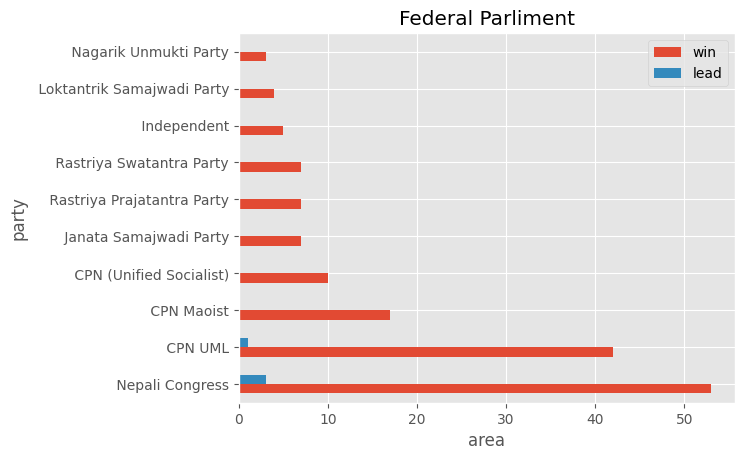

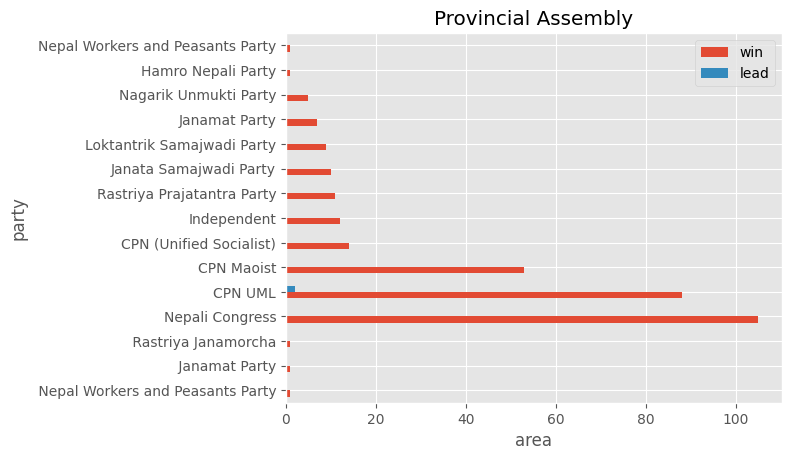

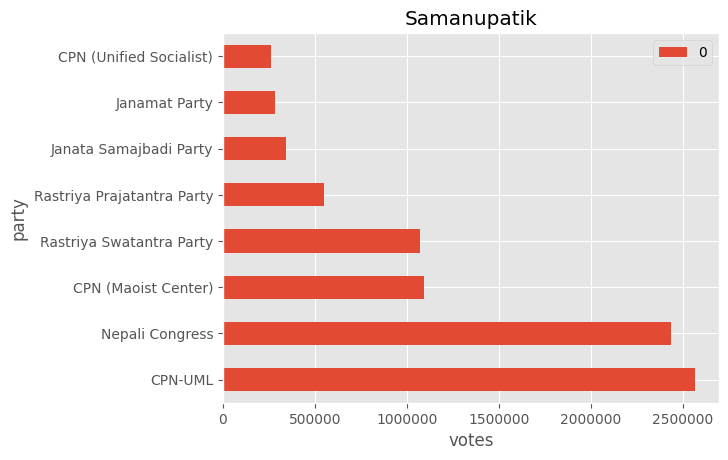

In [67]:
load_update(url)